In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import time
import pandas as pd

In [2]:
SVHN_train = torchvision.datasets.SVHN('/home/vbhandaru/PycharmProjects/FinalProject/',split='train', download=True, transform=torchvision.transforms.ToTensor())
SVHN_test = torchvision.datasets.SVHN('/home/vbhandaru/PycharmProjects/FinalProject/', split='test', download=True, transform=torchvision.transforms.ToTensor())

Using downloaded and verified file: /home/vbhandaru/PycharmProjects/FinalProject/train_32x32.mat
Using downloaded and verified file: /home/vbhandaru/PycharmProjects/FinalProject/test_32x32.mat


In [3]:
#Separate training into training and validation
print(len(SVHN_train), len(SVHN_test))
a = list(range(len(SVHN_train)))
np.random.seed(5)
np.random.shuffle(a)
val_indices = a[0:7000]
train1_indices = a[7000:]
val = [SVHN_train[i] for i in val_indices]
train1 = [SVHN_train[i] for i in train1_indices]
print(len(val), len(train1))

(73257, 26032)
(7000, 66257)


In [21]:
def conv_train(train_data=SVHN_train, num_epochs=10, batch_size=100, val_data=None, validate=0):
    start = time.time()
    criterion = torch.nn.CrossEntropyLoss()
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
    if validate==1:
        val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
    for epoch in range(num_epochs):
        if epoch%10==0: print("epoch ", epoch)
        model.train()
        for data in train_loader:
            inputs, labels = data
            inputs = Variable(inputs.cuda())
            labels = Variable(labels.cuda())
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        if validate==1:
            model.eval()
            for i, data in enumerate(val_loader):
                inputs, labels = data
                inputs = Variable(inputs.cuda())
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                if i==0:
                    df = pd.DataFrame({'Predicted':list(preds), 'Actual': list(labels)})
                if i>0:
                    df1 = pd.DataFrame({'Predicted':list(preds), 'Actual': list(labels)})
                    df = pd.concat([df, df1])
            epoch_acc = accuracy_score(df['Actual'], df['Predicted'])
            acc1 = pd.DataFrame({'Epoch': [epoch], 'Accuracy': [epoch_acc] })
            if epoch==0:
                acc = acc1
            else:
                acc = pd.concat([acc, acc1])
    if validate==1: return acc    
    end = time.time()
    t1 = end-start
    print str(t1) + ' seconds'

In [5]:
class Flatten(torch.nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    

In [22]:
#Find optimal batch size
model = torch.nn.Sequential(
        torch.nn.Conv2d(3,20,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Conv2d(20,50,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Dropout2d(0.25),
        Flatten(),
        torch.nn.Linear(1250, 500), 
        torch.nn.ReLU(),
        torch.nn.Linear(500, 10), 
        torch.nn.LogSoftmax()
        ).cuda() 
optimizer =torch.optim.SGD(model.parameters(),lr=0.01)
print 'Batch size 16'
conv_train(batch_size=16, num_epochs=2)
print 'Batch size 50'
conv_train(batch_size=50, num_epochs=2)
print 'Batch size 100'
conv_train(batch_size=100, num_epochs=2)
print 'Batch size 200'
conv_train(batch_size=200, num_epochs=2)
print 'Batch size 500'
conv_train(batch_size=500, num_epochs=2)
print 'Batch size 1000'
conv_train(batch_size=1000, num_epochs=2)
print 'Batch size 5000'
conv_train(batch_size=5000, num_epochs=2)
print 'Batch size 10000'
conv_train(batch_size=10000, num_epochs=2)
print 'Batch size 15000'
conv_train(batch_size=15000, num_epochs=2)
print 'Batch size 25000'
conv_train(batch_size=25000, num_epochs=2)

Batch size 16
('epoch ', 0)
32.1282219887 seconds
Batch size 50
('epoch ', 0)
18.3828430176 seconds
Batch size 100
('epoch ', 0)
15.3778221607 seconds
Batch size 200
('epoch ', 0)
13.7388448715 seconds
Batch size 500
('epoch ', 0)
12.7581150532 seconds
Batch size 1000
('epoch ', 0)
12.6773319244 seconds
Batch size 5000
('epoch ', 0)
13.69896698 seconds
Batch size 10000
('epoch ', 0)
14.3668179512 seconds
Batch size 15000
('epoch ', 0)
13.8881938457 seconds
Batch size 25000
('epoch ', 0)
13.9888870716 seconds


,Time (s)
Batch size,
16,32.12822
50,18.38284
100,15.37782
200,13.73884
500,12.75812
1000,12.67733
5000,13.69897
10000,14.36682
15000,13.88819


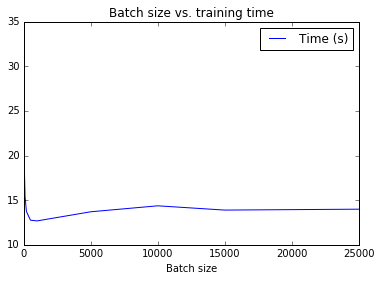

In [25]:
seconds = [32.12822, 18.38284, 15.37782, 13.73884, 12.75812, 12.67733, 13.69897, 14.36682, 13.88819, 13.98889]
batch_size_list = [16, 50, 100, 200, 500, 1000, 5000, 10000, 15000, 25000]
batch1 = pd.DataFrame({'Batch size': batch_size_list, 'Time (s)': seconds}).set_index('Batch size')
batch1.plot(title='Batch size vs. training time')
batch1

In [6]:
#Find best optimizer and learning rate
model = torch.nn.Sequential(
        torch.nn.Conv2d(3,20,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Conv2d(20,50,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Dropout2d(0.25),
        Flatten(),
        torch.nn.Linear(1250, 500), 
        torch.nn.ReLU(),
        torch.nn.Linear(500, 10), 
        torch.nn.LogSoftmax()
        ).cuda() 

optimizer =torch.optim.SGD(model.parameters(),lr=0.05)
sgd_05 = conv_train(train_data=train1, num_epochs=75, batch_size=1000, val_data=val, validate=1)

model = torch.nn.Sequential(
        torch.nn.Conv2d(3,20,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Conv2d(20,50,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Dropout2d(0.25),
        Flatten(),
        torch.nn.Linear(1250, 500), 
        torch.nn.ReLU(),
        torch.nn.Linear(500, 10), 
        torch.nn.LogSoftmax()
        ).cuda() 

optimizer =torch.optim.SGD(model.parameters(),lr=0.01)
sgd_01 = conv_train(train_data=train1, num_epochs=75, batch_size=1000, val_data=val, validate=1)

model = torch.nn.Sequential(
        torch.nn.Conv2d(3,20,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Conv2d(20,50,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Dropout2d(0.25),
        Flatten(),
        torch.nn.Linear(1250, 500), 
        torch.nn.ReLU(),
        torch.nn.Linear(500, 10), 
        torch.nn.LogSoftmax()
        ).cuda() 
optimizer =torch.optim.SGD(model.parameters(),lr=0.001)
sgd_001 = conv_train(train_data=train1, num_epochs=75, batch_size=1000, val_data=val, validate=1)

model = torch.nn.Sequential(
        torch.nn.Conv2d(3,20,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Conv2d(20,50,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Dropout2d(0.25),
        Flatten(),
        torch.nn.Linear(1250, 500), 
        torch.nn.ReLU(),
        torch.nn.Linear(500, 10), 
        torch.nn.LogSoftmax()
        ).cuda() 
optimizer =torch.optim.SGD(model.parameters(),lr=0.1)
sgd_1 = conv_train(train_data=train1, num_epochs=75, batch_size=1000, val_data=val, validate=1)


('epoch ', 0)
('epoch ', 10)
('epoch ', 20)
('epoch ', 30)
('epoch ', 40)
('epoch ', 50)
('epoch ', 60)
('epoch ', 70)
('epoch ', 0)
('epoch ', 10)
('epoch ', 20)
('epoch ', 30)
('epoch ', 40)
('epoch ', 50)
('epoch ', 60)
('epoch ', 70)
('epoch ', 0)
('epoch ', 10)
('epoch ', 20)
('epoch ', 30)
('epoch ', 40)
('epoch ', 50)
('epoch ', 60)
('epoch ', 70)
('epoch ', 0)
('epoch ', 10)
('epoch ', 20)
('epoch ', 30)
('epoch ', 40)
('epoch ', 50)
('epoch ', 60)
('epoch ', 70)


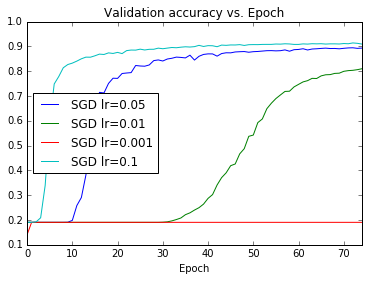

In [9]:
sgd = sgd_05.rename(columns={'Accuracy':'SGD lr=0.05'}).merge(sgd_01.rename(columns={'Accuracy':'SGD lr=0.01'}), on='Epoch')
sgd = sgd.merge(sgd_001.rename(columns={'Accuracy':'SGD lr=0.001'}), on='Epoch')
sgd = sgd.merge(sgd_1.rename(columns={'Accuracy':'SGD lr=0.1'}), on='Epoch').set_index('Epoch')
sgd.plot(title='Validation accuracy vs. Epoch')

In [10]:
model = torch.nn.Sequential(
        torch.nn.Conv2d(3,20,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Conv2d(20,50,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Dropout2d(0.25),
        Flatten(),
        torch.nn.Linear(1250, 500), 
        torch.nn.ReLU(),
        torch.nn.Linear(500, 10), 
        torch.nn.LogSoftmax()
        ).cuda()
optimizer =torch.optim.Adam(model.parameters(),lr=0.05)
adam_05 = conv_train(train_data=train1, num_epochs=75, batch_size=1000, val_data=val, validate=1)

model = torch.nn.Sequential(
        torch.nn.Conv2d(3,20,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Conv2d(20,50,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Dropout2d(0.25),
        Flatten(),
        torch.nn.Linear(1250, 500), 
        torch.nn.ReLU(),
        torch.nn.Linear(500, 10), 
        torch.nn.LogSoftmax()
        ).cuda()
optimizer =torch.optim.Adam(model.parameters(),lr=0.01)
adam_01 = conv_train(train_data=train1, num_epochs=75, batch_size=1000, val_data=val, validate=1)

model = torch.nn.Sequential(
        torch.nn.Conv2d(3,20,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Conv2d(20,50,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Dropout2d(0.25),
        Flatten(),
        torch.nn.Linear(1250, 500), 
        torch.nn.ReLU(),
        torch.nn.Linear(500, 10), 
        torch.nn.LogSoftmax()
        ).cuda()
optimizer =torch.optim.Adam(model.parameters(),lr=0.001)
adam_001 = conv_train(train_data=train1, num_epochs=75, batch_size=1000, val_data=val, validate=1)

model = torch.nn.Sequential(
        torch.nn.Conv2d(3,20,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Conv2d(20,50,5),
        torch.nn.MaxPool2d(2, stride=2),
        torch.nn.ReLU(),
        torch.nn.Dropout2d(0.25),
        Flatten(),
        torch.nn.Linear(1250, 500), 
        torch.nn.ReLU(),
        torch.nn.Linear(500, 10), 
        torch.nn.LogSoftmax()
        ).cuda()
optimizer =torch.optim.Adam(model.parameters(),lr=0.1)
adam_1 = conv_train(train_data=train1, num_epochs=75, batch_size=1000, val_data=val, validate=1)


('epoch ', 0)
('epoch ', 10)
('epoch ', 20)
('epoch ', 30)
('epoch ', 40)
('epoch ', 50)
('epoch ', 60)
('epoch ', 70)
('epoch ', 0)
('epoch ', 10)
('epoch ', 20)
('epoch ', 30)
('epoch ', 40)
('epoch ', 50)
('epoch ', 60)
('epoch ', 70)
('epoch ', 0)
('epoch ', 10)
('epoch ', 20)
('epoch ', 30)
('epoch ', 40)
('epoch ', 50)
('epoch ', 60)
('epoch ', 70)
('epoch ', 0)
('epoch ', 10)
('epoch ', 20)
('epoch ', 30)
('epoch ', 40)
('epoch ', 50)
('epoch ', 60)
('epoch ', 70)


       Adam lr=0.05  Adam lr=0.01  Adam lr=0.001  Adam lr=0.1
Epoch                                                        
65         0.190571      0.190571       0.913429     0.190571
66         0.190571      0.190571       0.912571     0.190571
67         0.190571      0.190571       0.911000     0.190571
68         0.190571      0.190571       0.909857     0.190571
69         0.190571      0.190571       0.910714     0.190571
70         0.190571      0.190571       0.909429     0.190571
71         0.190571      0.190571       0.911000     0.190571
72         0.190571      0.190571       0.910571     0.190571
73         0.190571      0.190571       0.910714     0.190571
74         0.190571      0.190571       0.913571     0.190571


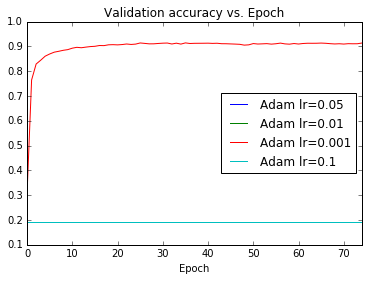

In [12]:
adam = adam_05.rename(columns={'Accuracy':'Adam lr=0.05'}).merge(adam_01.rename(columns={'Accuracy':'Adam lr=0.01'}), on='Epoch')
adam = adam.merge(adam_001.rename(columns={'Accuracy':'Adam lr=0.001'}), on='Epoch')
adam = adam.merge(adam_1.rename(columns={'Accuracy':'Adam lr=0.1'}), on='Epoch').set_index('Epoch')
adam.plot(title='Validation accuracy vs. Epoch')
print(adam.tail(10))

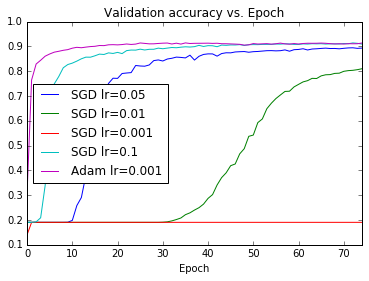

In [18]:
sgd2 = sgd.merge(adam_001.rename(columns={'Accuracy':'Adam lr=0.001'}).set_index('Epoch'), left_index=True, right_index=True)
sgd2.plot(title='Validation accuracy vs. Epoch')